# Student number: 202125489

# Assignment

## 771762 - Big Data and Data Mining Project
----

This research analyses maternal health service data, and identify evidence based actions with an aim to improve health outcomes and mitigate maternal motality.

# Dependencies

In [102]:
#import the libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")

# Load Data
The data is loaded from a csv file format and parsed to pandas dataframe for analysis.

In [103]:
# load data into dataframe
mhs_df = pd.read_csv('mhs.csv')
mhs_df.sample(20)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
644,25,140,100,15.00,98.6,70,high risk
452,25,140,100,6.80,98.0,80,high risk
848,15,70,50,6.00,98.0,70,mid risk
833,50,130,100,16.00,98.0,75,mid risk
871,29,130,70,6.70,98.0,78,mid risk
441,23,130,70,6.80,98.0,78,mid risk
422,36,140,100,6.80,102.0,76,high risk
23,18,90,60,7.50,98.0,70,low risk
536,16,100,70,7.50,98.0,80,low risk
318,54,130,70,12.00,98.0,67,mid risk


In [104]:
#dataset shape
mhs_df.shape

(1014, 7)

# Data Cleaning and Preprocessing

Here, the dataset is inspected and cleaned. The dataset is preprocessed to conform to uniform format to aid analysis

In [105]:
#check for null entries
mhs_df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [106]:
#check for duplicates
mhs_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1009     True
1010     True
1011     True
1012     True
1013     True
Length: 1014, dtype: bool

In [107]:
#view duplicated rows
mhs_df[mhs_df.duplicated()]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [108]:
#check datatype of features and null values
mhs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [109]:
#check overall statistics
mhs_df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


# Exploratory Data Analysis
Analysis of data done which involves visually exploring, summarizing, and interpreting the main features of a dataset.

In [110]:
#encode RiskLevel column into numeral values using LabelEncoder
le = LabelEncoder() #initialize labelencoder object

risklevel = le.fit_transform(mhs_df['RiskLevel']) #fit the LabelEncoder on the RiskLevel feature

In [111]:
#list classes of the encoded RiskLevel feature
le.classes_

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [112]:
#replace the RiskLevel values with the encoded values
mhs_df['RiskLevel'] = risklevel

In [113]:
#view sample of the dataset
mhs_df.sample(20)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
338,70,85,60,6.90,102.0,70,1
779,19,120,85,7.80,98.0,60,2
48,15,76,49,7.50,98.0,77,1
793,22,90,60,6.80,98.0,77,2
979,48,120,80,11.00,98.0,88,0
596,21,75,50,7.50,98.0,60,1
653,15,76,68,7.00,98.0,77,1
684,32,140,100,6.90,98.0,78,0
77,55,120,90,12.00,98.0,70,2
423,22,90,60,6.80,98.0,77,1


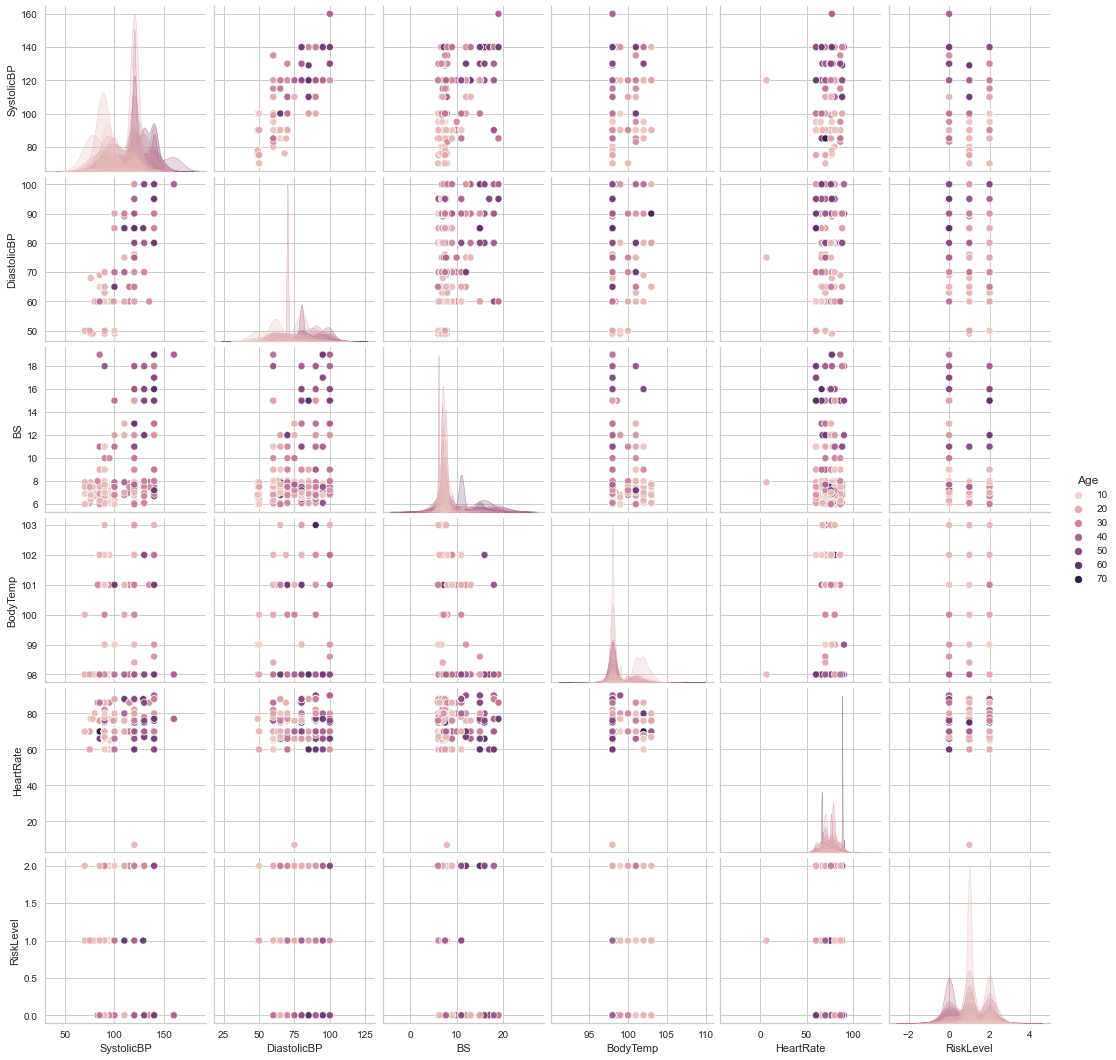

In [114]:
#data Exploration using pair plots
sns.pairplot(mhs_df, hue='Age')
plt.savefig('pairplot.png')
plt.show()

In [115]:
#view minimum heartrate
mhs_df['HeartRate'].min()

7

Human heartrate ranges from 60-120BPM though can go as low as 40BPM for athletes.
Martin Brady holds the Guinness world record for the slowest heart rate with a certified rate over a minute duration of 27 BPM. Heartrate of 7BPM is considered errornous in this case.

In [116]:
#view records having the minimum heartrate
mhs_df[mhs_df.HeartRate==7]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,1
908,16,120,75,7.9,98.0,7,1


In [117]:
#drop records having the minimum heartrate
mhs_df[mhs_df.HeartRate==7].index
mhs_df.drop(mhs_df[mhs_df.HeartRate==7].index, axis=0, inplace=True)

In [118]:
#view all records
mhs_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0
1010,55,120,90,18.0,98.0,60,0
1011,35,85,60,19.0,98.0,86,0
1012,43,120,90,18.0,98.0,70,0


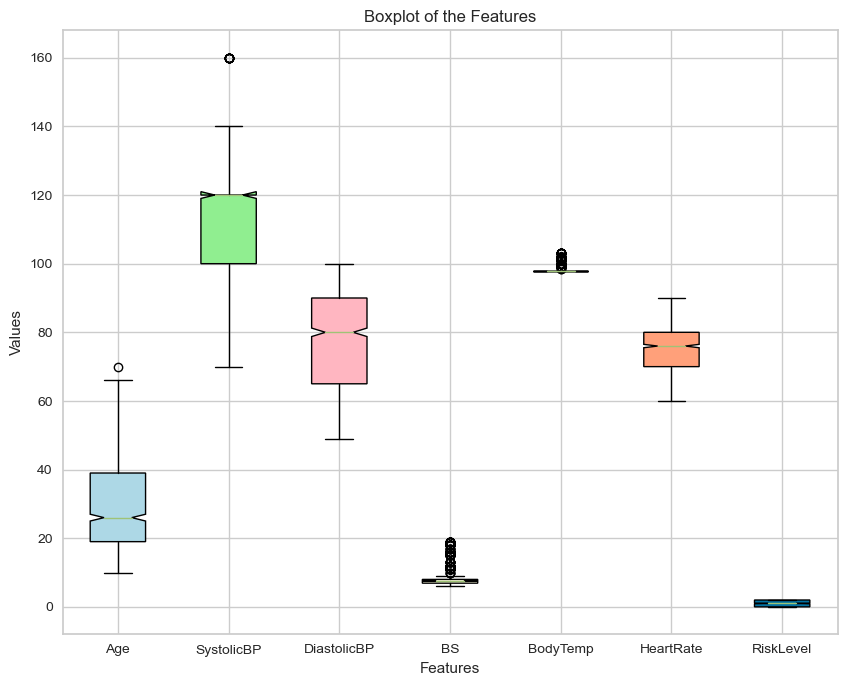

In [119]:
#boxplot to visualization some of the statistical values across the features

# Plot the boxplot
fig = plt.figure(figsize =(10, 8), dpi=100)
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(mhs_df, patch_artist = True,notch ='True')

# Set the colors of the boxes
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan', 'lightsalmon']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# x-axis labels
ax.set_xticklabels(mhs_df.columns)

# Add a title and labels
plt.title('Boxplot of the Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()

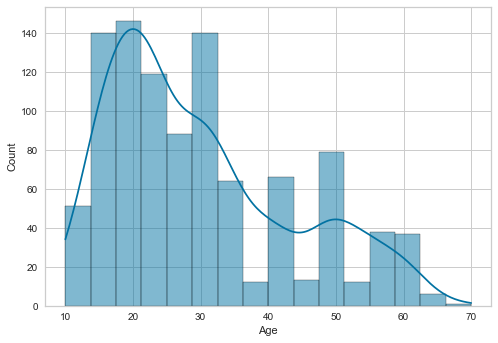

In [120]:
#Age distribution
sns.histplot(data=mhs_df, x='Age', kde=True);

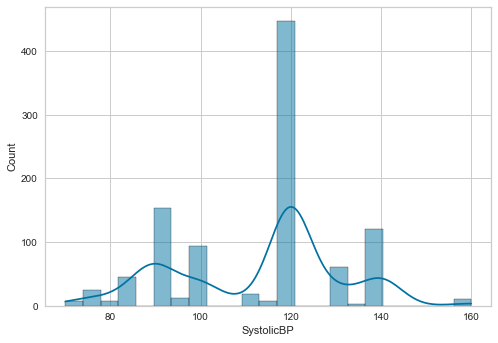

In [121]:
#SystolicBP distribution
sns.histplot(data=mhs_df, x='SystolicBP', kde=True);

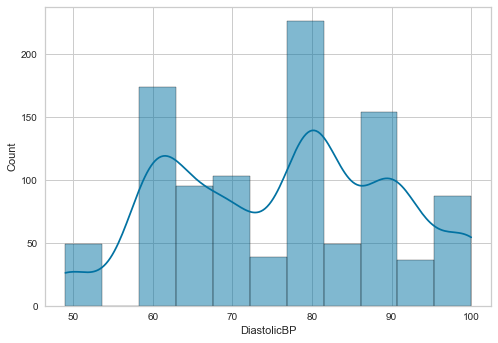

In [122]:
#DiastolicBP distribution
sns.histplot(data=mhs_df, x='DiastolicBP', kde=True);

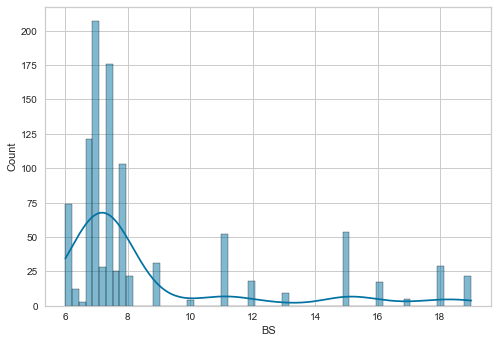

In [123]:
#Blood sugar distribution
sns.histplot(data=mhs_df, x='BS', kde=True);

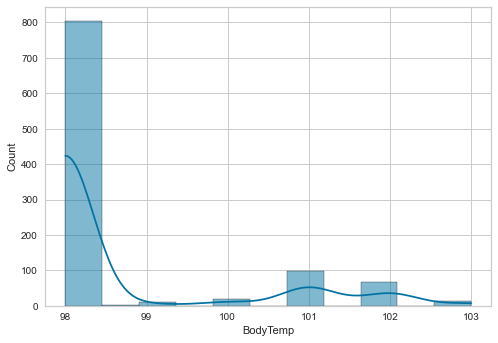

In [124]:
#body temperature distribution
sns.histplot(data=mhs_df, x='BodyTemp', kde=True);

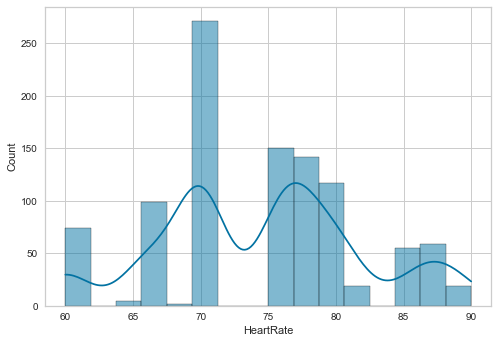

In [125]:
#Heart rate distribution
sns.histplot(data=mhs_df, x='HeartRate', kde=True);

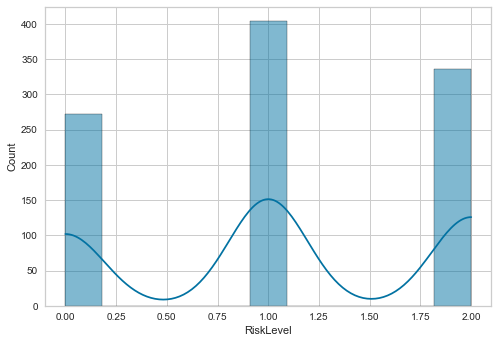

In [126]:
#Risk level distribution
sns.histplot(data=mhs_df, x='RiskLevel', kde=True);

# Question1: Linear Model 

A linear model will be built using SystolicBp as the target/ response variable and some exploratory variables as the features. These variables will be obtained using two techniques:
- Correlation coefficeint - The top three exploratory variable based on the correlation coefficeint with systolicBp will be choosen.
- ANOVA F-value - The SelectKBest library will be used to obtain the measure used in statistical analysis of variance (ANOVA) and the top three features based on the F-value will be choosen.

The two technique is expected to return the same set of exploratory variables

The linear model will be evaluated using:
- R-squared measure (r2-score): Measures the proportion of variance in the dependent variable that can be explained by the independent variables. It ranges from 0 to 1, with higher values indicating a better fit.
- Root mean squared error (RMSE): measures the average magnitude of the residuals (prediction errors) in the original units of the dependent variable. Lower values of RMSE indicate better model performance, as they represent smaller prediction errors.

### Features Selection using correlation coefficient

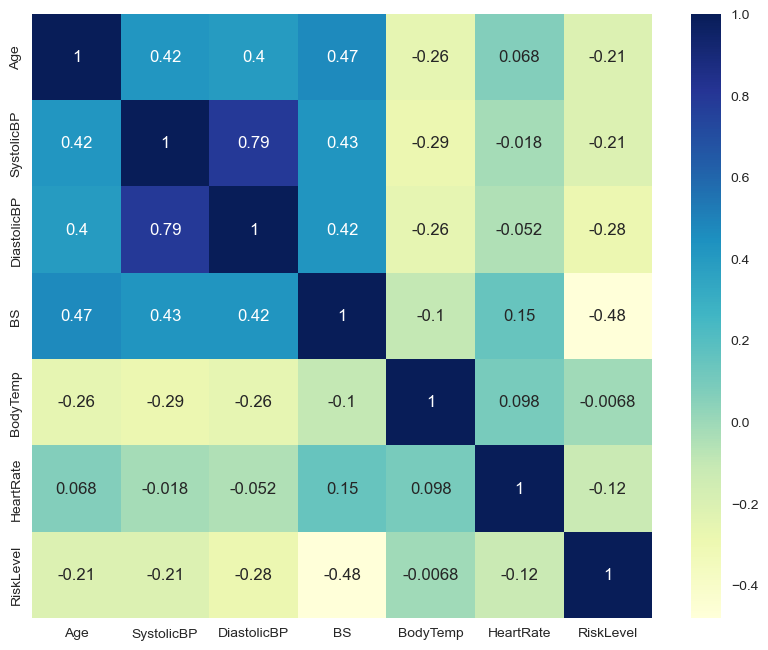

In [127]:
#show correlation coefficient of the features
plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(mhs_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Features Selection using SelectKBest

In [128]:
#get features
features_df = mhs_df.drop(['SystolicBP'], axis=1)

#get target
target = mhs_df['SystolicBP']

In [129]:
# configure to select best three features
fs = SelectKBest(score_func=f_regression, k=3)

# learn relationship from data
fs.fit(features_df, target)

SelectKBest(k=3, score_func=<function f_regression at 0x00000198C85F3F70>)

In [130]:
# transform features input data
features_fs=fs.transform(features_df)
features_fs

array([[25., 80., 15.],
       [35., 90., 13.],
       [29., 70.,  8.],
       ...,
       [35., 60., 19.],
       [43., 90., 18.],
       [32., 65.,  6.]])

In [131]:
#get supported features
support_features = fs.get_support()
support_features

array([ True,  True,  True, False, False, False])

In [132]:
#get all feature names
feature_names = np.array(features_df.columns)
feature_names

array(['Age', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel'],
      dtype=object)

In [133]:
#filter for supported features
feature_names[support_features]

array(['Age', 'DiastolicBP', 'BS'], dtype=object)

In [134]:
features_select = feature_names[support_features]

In [135]:
#parsed features and score into a dataframe
features_score = []
for feature, score in zip(np.array(features_df.columns).reshape(6,1),np.array(fs.scores_).reshape(6,1)):
    features_score.append((feature[0], score[0]))
    
fs = pd.DataFrame(data=features_score, columns=['feature','score'])
fs

,feature,score
0,Age,212.956812
1,DiastolicBP,1645.667110
2,BS,223.208693
3,BodyTemp,90.224617
4,HeartRate,0.339397
5,RiskLevel,46.025426


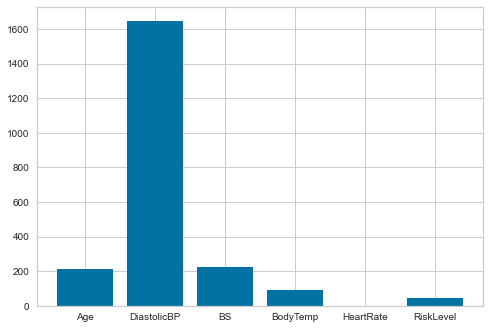

In [136]:
# plot the scores
plt.bar(fs['feature'], fs['score'])
plt.show()

### Regression model development and evaluation

In [137]:
#initial linear model
linear_model = LinearRegression()

In [138]:
#split data into training and testing set with best features
X_train, X_test, y_train, y_test = train_test_split(features_fs,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

In [139]:
#fit model with training data
linear_model.fit(X_train, y_train)

LinearRegression()

In [140]:
# evaluate model
pred = linear_model.predict(X_test) #get model predictions on test data


r2score=r2_score(y_test, pred) #get r2 score on predictions
mse=mean_squared_error(y_test, pred) #get mean square error on predictions
rmse=np.sqrt(mean_squared_error(y_test,pred)) #get root mean square error on predictions

print(f'r2 score:{r2score:.4f}\nmean squared error:{mse:.4f}\nroot mean square error:{rmse:.4f}')

r2 score:0.5887
mean squared error:129.1531
root mean square error:11.3646


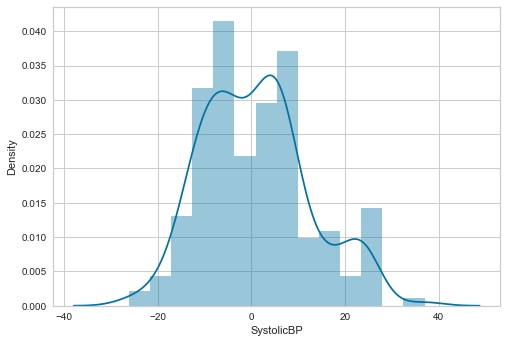

In [141]:
#explore residual
residual = y_test-pred
sns.distplot(residual)
plt.show()

# Question 2: Principal Component Analysis

Principal Component Analysis (PCA) is a widely used technique in data analysis and machine learning for dimensionality reduction. It is a mathematical method that transforms high-dimensional data into a lower-dimensional space while preserving as much of the original information as possible.

The principal components obtained will be used to train a linear model to asses how behavior of the principal components and reduction techniques generally.

In [142]:
#get features
features_df = mhs_df.drop(['SystolicBP'], axis=1)

#get target
target = mhs_df['SystolicBP']

In [143]:
#initialize standard scaler
std_scaler = StandardScaler()

#standardize data
X_std = std_scaler.fit_transform(features_df)

#parse standardized data into dataframe
X_std_df = pd.DataFrame(X_std, columns=features_df.columns)
X_std_df

,Age,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,-0.363796,0.254566,1.903633,-0.485808,1.538308,-1.376324
1,0.378765,0.974379,1.296644,-0.485808,-0.589878,-1.376324
2,-0.066772,-0.465247,-0.220828,0.972192,0.740239,-1.376324
3,0.007484,0.614473,-0.524323,-0.485808,-0.589878,-1.376324
4,0.378765,-1.185059,-0.797468,-0.485808,0.208192,-0.081863
...,...,...,...,...,...,...
1007,-0.586565,-1.185059,1.903633,-0.485808,0.740239,-1.376324
1008,1.863888,0.974379,2.814116,-0.485808,-1.919994,-1.376324
1009,0.378765,-1.185059,3.117610,-0.485808,1.538308,-1.376324
1010,0.972814,0.974379,2.814116,-0.485808,-0.589878,-1.376324


In [144]:
#fit PCA on data
pca=PCA().fit(X_std_df)

print(f'Explained variance ratio per component:{pca.explained_variance_ratio_}')

Explained variance ratio per component:[0.3731001  0.20383747 0.14719373 0.11081852 0.09535191 0.06969827]


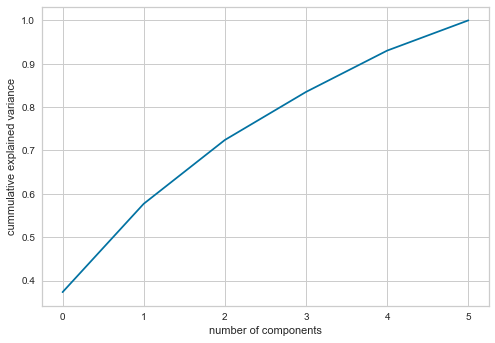

In [145]:
#plot cummulative sum of PC variances
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance')
plt.show()

In [146]:
#obtain first 3 principal component of data using PCA
pca=PCA(n_components=3)
pca_data = pca.fit_transform(X_std_df)

print(f'Explained variance ratio per component:{pca.explained_variance_ratio_}')

Explained variance ratio per component:[0.3731001  0.20383747 0.14719373]


In [147]:
#parse data into dataframe
pca_data_df = pd.DataFrame(pca_data, columns=['PC1','PC2','PC3'])
pca_data_df

,PC1,PC2,PC3
0,1.805484,1.542191,-0.448551
1,1.985969,-0.159554,0.961240
2,0.029798,1.628697,0.397342
3,0.643521,-0.397186,0.818734
4,-0.651342,-0.079567,-0.684960
...,...,...,...
1007,0.927319,1.410007,-0.023480
1008,3.408278,-0.873405,1.711414
1009,2.131203,2.017439,-0.723890
1010,3.098679,0.068269,0.964934


In [148]:
pca_data_df['SystolicBP']=mhs_df['SystolicBP']
pca_data_df

,PC1,PC2,PC3,SystolicBP
0,1.805484,1.542191,-0.448551,130.0
1,1.985969,-0.159554,0.961240,140.0
2,0.029798,1.628697,0.397342,90.0
3,0.643521,-0.397186,0.818734,140.0
4,-0.651342,-0.079567,-0.684960,120.0
...,...,...,...,...
1007,0.927319,1.410007,-0.023480,120.0
1008,3.408278,-0.873405,1.711414,120.0
1009,2.131203,2.017439,-0.723890,120.0
1010,3.098679,0.068269,0.964934,120.0


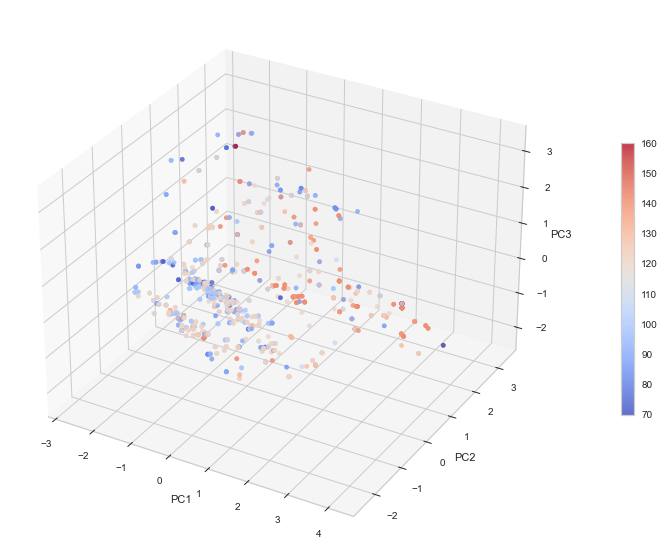

In [149]:
# 3D plot showing the relational of the principal components with SystolicBP
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(xs=pca_data_df['PC1'], ys=pca_data_df['PC2'], zs=pca_data_df['PC3'], c=pca_data_df['SystolicBP'], cmap='coolwarm', alpha=0.8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')


plt.colorbar(scatter, shrink=0.5)
plt.show()

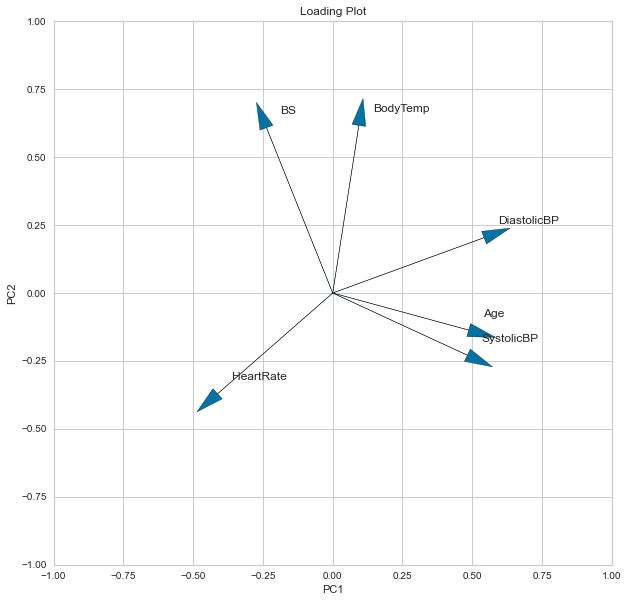

In [150]:
#Loading plot showing how strongly each feature influences the first two principal components (PC1 and PC2)
fig, ax = plt.subplots(figsize=(10, 10))
for i, (x, y) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.1)
    ax.text(x + 0.05, y + 0.05, mhs_df.columns[i], fontsize=12)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Loading Plot")
plt.show()

### Linear model development and evaluation

In [151]:
#initial linear model
linear_model = LinearRegression()

In [152]:
#split data into training and testing set with best features
X_train, X_test, y_train, y_test = train_test_split(pca_data_df[['PC1','PC2','PC3']],
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

In [153]:
X_train.shape

(809, 3)

In [154]:
#fit model with training data
linear_model.fit(X_train, y_train)

LinearRegression()

In [155]:
# evaluate model
pred = linear_model.predict(X_test) #get model predictions on test data


r2score=r2_score(y_test, pred) #get r2 score on predictions
mse=mean_squared_error(y_test, pred) #get mean square error on predictions
rmse=np.sqrt(mean_squared_error(y_test,pred)) #get root mean square error on predictions

print(f'r2 score:{r2score:.4f}\nmean squared error:{mse:.4f}\nroot mean square error:{rmse:.4f}')

r2 score:0.4509
mean squared error:172.4106
root mean square error:13.1305


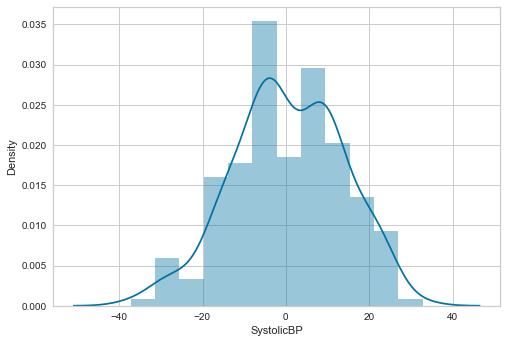

In [156]:
#explore residual
residual = y_test-pred
sns.distplot(residual)
plt.show()

### Non-Linear model (Random Forest regressor) development and evaluation 

In [157]:
#initial model
rf = RandomForestRegressor(max_depth=12, random_state=0)

In [158]:
#fit model with training data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, random_state=0)

In [159]:
# evaluate model
pred = rf.predict(X_test) #get model predictions on test data


r2score=r2_score(y_test, pred) #get r2 score on predictions
mse=mean_squared_error(y_test, pred) #get mean square error on predictions
rmse=np.sqrt(mean_squared_error(y_test,pred)) #get root mean square error on predictions

print(f'r2 score:{r2score:.4f}\nmean squared error:{mse:.4f}\nroot mean square error:{rmse:.4f}')

r2 score:0.8665
mean squared error:41.9282
root mean square error:6.4752


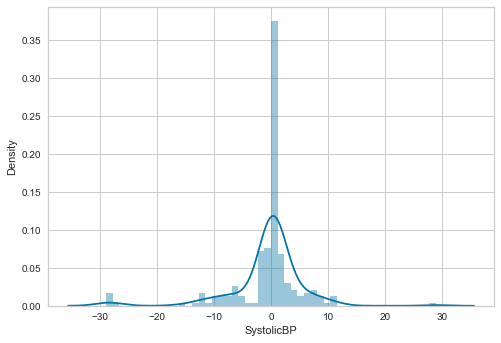

In [160]:
#explore residual
residual = y_test-pred
sns.distplot(residual)
plt.show()

# Question 3: Relationship between age and heartrate 

The relationship between age and heart arte is obatined by means of age grouping. The ages were grouped based on NHS age designation. The mean of each group is then obtain and a line plot is used to visualize the relationship

In [87]:
#new dataframe to hold Age and Heartrate data
new_df = mhs_df[['Age','HeartRate']]
new_df

,Age,HeartRate
0,25,86
1,35,70
2,29,80
3,30,70
4,35,76
...,...,...
1009,22,80
1010,55,60
1011,35,86
1012,43,70


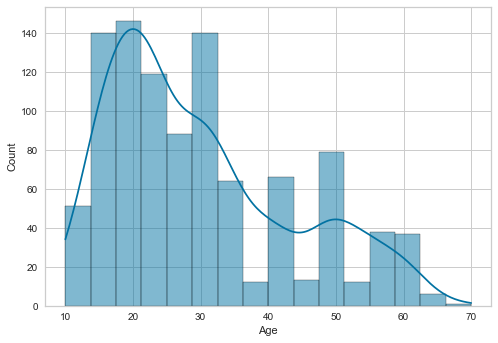

In [88]:
#distribution of age in the dataset
sns.histplot(data=new_df, x='Age', kde=True);

In [90]:
#get mininum and maximum age
min_age=new_df['Age'].min()
max_age=new_df['Age'].max()
print(f'minimum age:{min_age}\nmaximum age:{max_age}')

minimum age:10
maximum age:70


In [91]:
#create a new column for age groups
bins= [0,1,3,13,17,64,120]
labels = ['Baby','Toddler','Child','Teenager','Adult','Older people']
new_df['AgeGroup'] = pd.cut(new_df['Age'], bins=bins, labels=labels, right=False)
new_df

,Age,HeartRate,AgeGroup
0,25,86,Adult
1,35,70,Adult
2,29,80,Adult
3,30,70,Adult
4,35,76,Adult
...,...,...,...
1009,22,80,Adult
1010,55,60,Adult
1011,35,86,Adult
1012,43,70,Adult


In [92]:
#group age groups by mean heartrate
mean_heartrate = new_df.groupby("AgeGroup")["HeartRate"].mean()
mean_heartrate

AgeGroup
Baby                  NaN
Toddler               NaN
Child           67.205128
Teenager        75.651685
Adult           74.614334
Older people    77.600000
Name: HeartRate, dtype: float64

In [93]:
#convert series to dataframe
mean_heartrate =pd.DataFrame({'AgeGroup':mean_heartrate.index, 'Average_heartrate':mean_heartrate.values})
mean_heartrate

,AgeGroup,Average_heartrate
0,Baby,NaN
1,Toddler,NaN
2,Child,67.205128
3,Teenager,75.651685
4,Adult,74.614334
5,Older people,77.600000


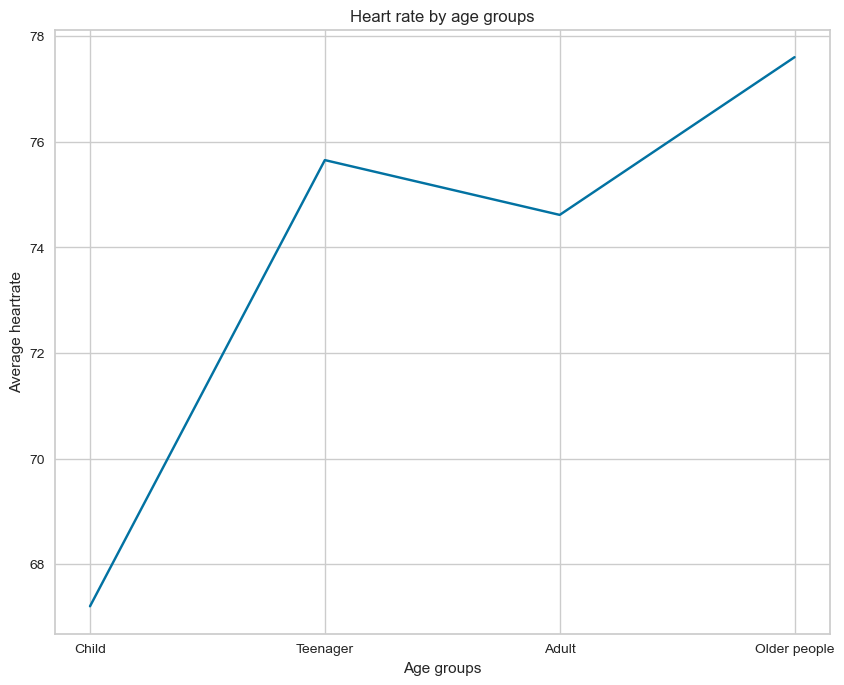

In [94]:
#plot relationship between heartrate and age group
plt.figure(figsize=(10, 8), dpi=100)
sns.lineplot(x=mean_heartrate['AgeGroup'], y=mean_heartrate['Average_heartrate'])
plt.title('Heart rate by age groups')
plt.xlabel('Age groups')
plt.ylabel('Average heartrate')
plt.show()

The plot shows only a slight increase over the age group. To understand the relationship better, the correlation coefficient will be obtained to determine if the relationship is linear.

In [95]:
#obtain pearsonr values for the relationship between Age and HeartRate
values = pearsonr(mhs_df['Age'],mhs_df['HeartRate']) # computes Pearsonr values
corr = values [0] #correlation coefficient 
pvalue = values [1] # p-value associated with the chosen alternative

print(f'correlation coefficient:{corr}')
print(f'p-value:{pvalue}')

correlation coefficient:0.06772672390787651
p-value:0.0312142861312048


The values obtained showed that the overall relationship between the age and heartrate is not linear in the dataset provided. This can be visualized using scatter plot

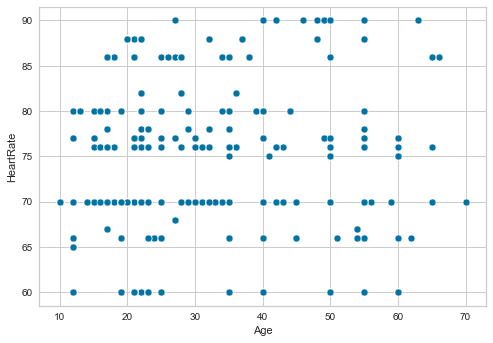

In [98]:
#scatter plot to visualze heartrate across all ages
sns.scatterplot(data=new_df, x='Age', y='HeartRate');

# Question 4: Association Pattern Mining

Association pattern mining is a data mining technique that involves discovering interesting relationships or associations between different variables or items in a large dataset. It is a process of analyzing transactional data to extract patterns or relationships that exist among different items or variables.

The rules for the association between SystolicBP and DiastolicBP are obtained and then evaluated based on:
- Support
- Confidence
- Conviction
- Lift


In [58]:
#create dataframe for Blood Pressure readings
BP_df =mhs_df[['SystolicBP','DiastolicBP']]
BP_df

,SystolicBP,DiastolicBP
0,130,80
1,140,90
2,90,70
3,140,85
4,120,60
...,...,...
1009,120,60
1010,120,90
1011,85,60
1012,120,90


In [59]:
#encode value ranges for SystolicBP and DiastolicBP
labels = ['low','normal','high']
systolicBP_bins= [0, 110, 140, 200]
diastolicBP_bins= [0, 70, 90, 200]

In [60]:
#map encodings to respective columns
BP_df['systolicBP_cat'] = pd.cut(BP_df['SystolicBP'], bins=systolicBP_bins, labels=labels, right=False)
BP_df['DiastolicBP_cat'] = pd.cut(BP_df['DiastolicBP'], bins=diastolicBP_bins, labels=labels, right=False)
BP_df

,SystolicBP,DiastolicBP,systolicBP_cat,DiastolicBP_cat
0,130,80,normal,normal
1,140,90,high,high
2,90,70,low,normal
3,140,85,high,normal
4,120,60,normal,low
...,...,...,...,...
1009,120,60,normal,low
1010,120,90,normal,high
1011,85,60,low,low
1012,120,90,normal,high


In [61]:
#filter encoded columns
BP_df=BP_df[['systolicBP_cat','DiastolicBP_cat']].rename(columns={'systolicBP_cat': 'systolicBP', 'DiastolicBP_cat': 'DiastolicBP'})
BP_df

,systolicBP,DiastolicBP
0,normal,normal
1,high,high
2,low,normal
3,high,normal
4,normal,low
...,...,...
1009,normal,low
1010,normal,high
1011,low,low
1012,normal,high


In [62]:
#hot encode columns
BP_df = pd.get_dummies(BP_df)
BP_df

,systolicBP_low,systolicBP_normal,systolicBP_high,DiastolicBP_low,DiastolicBP_normal,DiastolicBP_high
0,0,1,0,0,1,0
1,0,0,1,0,0,1
2,1,0,0,0,1,0
3,0,0,1,0,1,0
4,0,1,0,1,0,0
...,...,...,...,...,...,...
1009,0,1,0,1,0,0
1010,0,1,0,0,0,1
1011,1,0,0,1,0,0
1012,0,1,0,0,0,1


In [63]:
#generate the itemset using apriori algorithm
itemsets = apriori(BP_df, min_support=0.0001, use_colnames=True)

#insert cardinality of each record
itemsets['cardinality'] = itemsets['itemsets'].map(lambda x: len(x))
itemsets

,support,itemsets,cardinality
0,0.339921,(systolicBP_low),1
1,0.531621,(systolicBP_normal),1
2,0.128458,(systolicBP_high),1
3,0.317194,(DiastolicBP_low),1
4,0.410079,(DiastolicBP_normal),1
5,0.272727,(DiastolicBP_high),1
6,0.266798,"(systolicBP_low, DiastolicBP_low)",2
7,0.063241,"(systolicBP_low, DiastolicBP_normal)",2
8,0.009881,"(systolicBP_low, DiastolicBP_high)",2
9,0.050395,"(systolicBP_normal, DiastolicBP_low)",2


In [64]:
#generate association rules
rules = association_rules(itemsets, metric='support', min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(systolicBP_low),(DiastolicBP_low),0.339921,0.317194,0.266798,0.784884,2.474462,0.158978,3.174127
1,(DiastolicBP_low),(systolicBP_low),0.317194,0.339921,0.266798,0.841121,2.474462,0.158978,4.154615
2,(systolicBP_low),(DiastolicBP_normal),0.339921,0.410079,0.063241,0.186047,0.453685,-0.076153,0.724760
3,(DiastolicBP_normal),(systolicBP_low),0.410079,0.339921,0.063241,0.154217,0.453685,-0.076153,0.780435
4,(systolicBP_low),(DiastolicBP_high),0.339921,0.272727,0.009881,0.029070,0.106589,-0.082824,0.749047
5,(DiastolicBP_high),(systolicBP_low),0.272727,0.339921,0.009881,0.036232,0.106589,-0.082824,0.684894
6,(systolicBP_normal),(DiastolicBP_low),0.531621,0.317194,0.050395,0.094796,0.298857,-0.118231,0.754312
7,(DiastolicBP_low),(systolicBP_normal),0.317194,0.531621,0.050395,0.158879,0.298857,-0.118231,0.556851
8,(systolicBP_normal),(DiastolicBP_normal),0.531621,0.410079,0.333992,0.628253,1.532028,0.115986,1.586887
9,(DiastolicBP_normal),(systolicBP_normal),0.410079,0.531621,0.333992,0.814458,1.532028,0.115986,2.524383


# Question 5: Clustering

Kmeans algorithm is used to cluster the systolicBP data. The optimum number of clusters (K) suitable for clustering the SystolicBP is obtained using Elbow method and visualized by KElbowVisualizer library.
This technique is an unsupervised machine learning technique where each systolicBP value is then labelled by the cluster created (similar systolicBP values are group together).

In [51]:
#initiate datapoints for SystolicBP 
X = np.array(mhs_df['SystolicBP'])

# Reshape the datapoints to be a column vector
X = X.reshape(-1, 1)

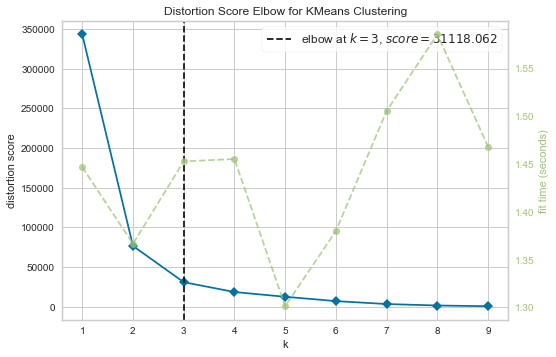

In [54]:
km = KMeans(random_state=42) #instantiate the KMeans object
#instantiate the visualizer passing the km model, number of clusters to iterate as arguments
visualizer = KElbowVisualizer(km, k=(1,10), metric='distortion', locate_elbow=True);
 
visualizer.fit(X)# Fit the data to the visualizer
visualizer.show(); #show the visualizer

In [55]:
# Cluster the data into 3 groups using KMeans algorithm
kmeans = KMeans(n_clusters=3, random_state=0)
mhs_df['labels'] = kmeans.fit_predict(X)

In [56]:
#rename labels into cluster 1, cluster 2 and cluster 3
mhs_df['labels'] = mhs_df['labels'].replace({0:'cluster 1',1:'cluster 2', 2:'cluster 3'})

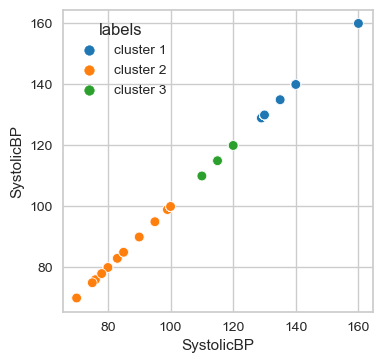

In [57]:
#visualize data points by thier clusters
plt.figure(figsize=(4,4),dpi=100)
sns.scatterplot(data=mhs_df, x=mhs_df['SystolicBP'],y=mhs_df['SystolicBP'],hue=mhs_df['labels'] ,palette='tab10')
plt.show()

# Question 6: Correlation between age and systolic BP

To evaluate the correlation between age and systolic BP, Pearson correlation coefficient and p-value for testing non-correlation utilized.
- correlation coefficient: Measures the linear relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.
- p-value: Indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets

In [49]:
#obtain pearsonr values for the relationship between Age and systolicBP
values = pearsonr(mhs_df['Age'],mhs_df['SystolicBP']) # computes Pearsonr values
corr = values [0] #correlation coefficient 
pvalue = values [1] # p-value associated with the chosen alternative

print(f'correlation coefficient:{corr}')
print(f'p-value:{pvalue}')

correlation coefficient:0.4172921436670314
p-value:6.559904051447564e-44


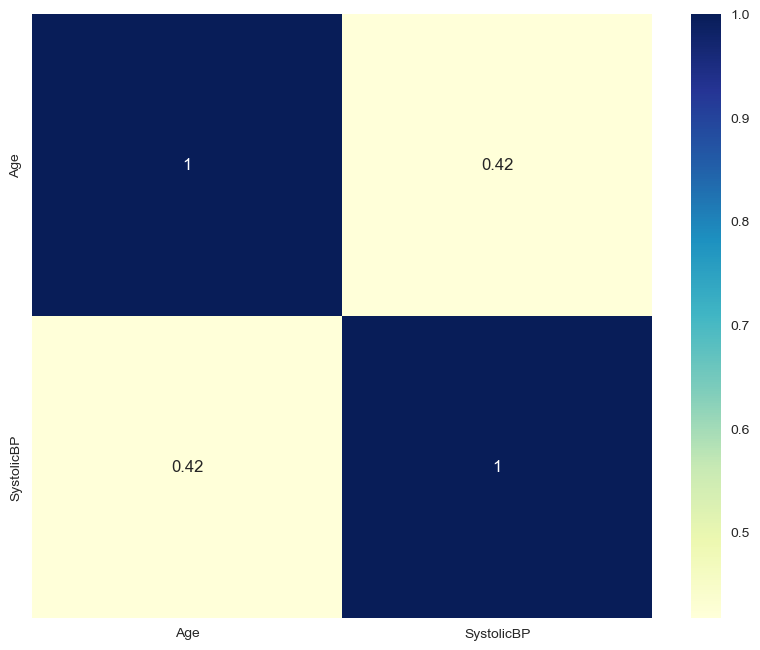

In [50]:
#plot correlation
plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(mhs_df[['Age','SystolicBP']].corr(), cmap="YlGnBu", annot=True)
plt.show()